# Somalia Threshold Analysis - Regional

The following examines the times when the anticipatory action threshold was reached by region in Somalia.

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import warnings
import shapefile as shp
warnings.filterwarnings('ignore')

import ipc_pop_data as ipd

import somalia_map as sm

In [2]:
shp_path = './gadm36_SOM_shp/gadm36_SOM_1.shp'
sf = shp.Reader(shp_path)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
somalia_reg = pd.read_csv("somalia_regional_transformed_cropped.csv")
somalia_reg['proj-start'] = pd.to_datetime(somalia_reg['proj-start'], format='%Y-%m-%d')
somalia_reg['proj-end'] = pd.to_datetime(somalia_reg['proj-end'], format='%Y-%m-%d')
somalia_reg['date'] = pd.to_datetime(somalia_reg['date'], format='%Y-%m-%d')
somalia_reg.head()

,region,date,total-pop,ipc-2,ipc-3,ipc-4,ipc-5,ipc-3_prev,ipc-4_prev,ipc-3_delta,ipc-4_delta,proj-start,proj-end,proj-ipc-2,proj-ipc-3,proj-ipc-4
0,Awdal,2014-01-01,305455,91000,0,0,0,NaN,NaN,NaN,NaN,2014-02-01,2014-06-01,85000,0,0
1,Awdal,2014-07-01,305455,78000,11000,0,0,0.0,0.0,0.036012,0.0,2014-08-01,2014-12-01,78000,11000,0
2,Awdal,2015-01-01,305455,43000,0,0,0,11000.0,0.0,-0.036012,0.0,2015-02-01,2015-06-01,35000,0,0
3,Awdal,2015-07-01,305455,38000,18000,0,0,0.0,0.0,0.058928,0.0,2015-08-01,2015-12-01,48000,40000,0
4,Awdal,2016-07-01,673264,152000,66000,0,0,18000.0,0.0,0.071294,0.0,2016-08-01,2016-12-01,137000,70000,12000


In [5]:
# fix this
def get_delta(row):
    if row['ipc-3'] + row['ipc-4'] == 0:
        row['ipc-3_delta'] = 0
    else:
        current_3 = row['ipc-3'] + row['ipc-4']
        proj_3 = row['proj-ipc-3'] + row['proj-ipc-4']
        row['ipc-3_delta'] = (proj_3-current_3)/current_3
    if row['ipc-4'] == 0:
        row['ipc-4_delta'] = 0
    else:
        row['ipc-4_delta'] = (row['proj-ipc-4']-row['ipc-4'])/row['ipc-4']
    return row

    #if row['ipc-3_prev'] == None:
    #    row['ipc-3_delta'] = None
    #else:
    #    row['ipc-3_delta'] = (row['ipc-3']-row['ipc-3_prev'])/row['total-pop']
    #if row['ipc-4_prev'] == None:
    #    row['ipc-4_delta'] = None
    #else:
    #    row['ipc-4_delta'] = (row['ipc-4']-row['ipc-4_prev'])/row['total-pop']
    #return row

"""
Add trigger options" The 'projected' [population weighted] districts in phase 3 and above exceed 20% (or 5 million), AND
▪ The projected [population weighted] districts in phase 3+ is projected to increase by a further 5%, OR - INCREASE
▪ The projected [population weighted] districts in phase 4 or above is 2.5% - ABSOLUTE

If this is reached, the threshold is reached in 'actual'

'Actual' = just 20% for dotted line + delta 5% from previous 

Split - when we used the 20% and when we used the others


Presentation: just present the projected
Methodology
National Level 
Subnational Level

"""

def add_trigger_options(row):
    if row['proj-ipc-3']+ row['proj-ipc-4'] >= row['total-pop']/5:
        row['option_1'] = 1
    elif row['proj-ipc-3'] + row['proj-ipc-4'] >= 5000000:
        row['option_1'] = 1
    else:
        row['option_1'] = 0
    if row['ipc-3_delta'] >= 0.05:
        row['option_2'] = 1
    else:
        row['option_2'] = 0
    if row['proj-ipc-4']/row['total-pop'] >= 0.025:
        row['option_3'] = 1
    else:
        row['option_3'] = 0
    if (row['option_1'] + row['option_2'] == 2) | (row['option_1'] + row['option_3'] == 2):
        row['threshold_reached'] = 1
    else:
        row['threshold_reached'] = 0
    return row

In [6]:
somalia_reg = somalia_reg.apply(lambda x: get_delta(x), axis=1)

somalia_reg = somalia_reg.apply(lambda x: add_trigger_options(x), axis=1)


In [20]:
#somalia_reg.loc[somalia_reg['threshold_reached']==1]
somalia_reg.loc[somalia_reg['date']=='2016-07-01']

,region,date,total-pop,ipc-2,ipc-3,ipc-4,ipc-5,ipc-3_prev,ipc-4_prev,ipc-3_delta,...,proj-start,proj-end,proj-ipc-2,proj-ipc-3,proj-ipc-4,option_1,option_2,option_3,threshold_reached,at-risk-count
4,Awdal,2016-07-01,673264,152000,66000,0,0,18000.0,0.0,0.242424,...,2016-08-01,2016-12-01,137000,70000,12000,0,1,0,0,66000
12,Woqooyi Galbeed,2016-07-01,1242003,103000,74000,8000,0,53000.0,4000.0,-0.036585,...,2016-08-01,2016-12-01,110000,68000,11000,0,0,0,0,82000
20,Togdheer,2016-07-01,721363,328000,25000,1000,0,26000.0,1000.0,0.000000,...,2016-08-01,2016-12-01,342000,25000,1000,0,0,0,0,26000
28,Sanaag,2016-07-01,544123,109000,48000,0,0,0.0,0.0,0.020833,...,2016-08-01,2016-12-01,109000,49000,0,0,0,0,0,48000
36,Sool,2016-07-01,327427,125000,12000,0,0,2000.0,0.0,0.000000,...,2016-08-01,2016-12-01,128000,12000,0,0,0,0,0,12000
44,Bari,2016-07-01,730147,369000,56000,0,0,54000.0,4000.0,0.071429,...,2016-08-01,2016-12-01,365000,60000,0,0,1,0,0,56000
52,Nugaal,2016-07-01,392698,123000,22000,0,0,5000.0,1000.0,0.409091,...,2016-08-01,2016-12-01,125000,31000,0,0,1,0,0,22000
60,Mudug,2016-07-01,717862,149000,43000,0,0,50000.0,0.0,0.093023,...,2016-08-01,2016-12-01,201000,47000,0,0,1,0,0,43000
68,Galgaduud,2016-07-01,569434,162000,44000,0,0,9000.0,0.0,0.113636,...,2016-08-01,2016-12-01,178000,49000,0,0,1,0,0,44000
76,Hiraan,2016-07-01,520686,134000,44000,0,0,7000.0,2000.0,1.181818,...,2016-08-01,2016-12-01,113000,96000,0,0,1,0,0,44000


In [8]:
summary_count = somalia_reg.loc[somalia_reg['threshold_reached']==1].groupby('date')['region'].count().reset_index()
summary_count.columns = ['date', 'count']
somalia_reg['at-risk-count'] = somalia_reg['ipc-3']+somalia_reg['ipc-4']
summary_pop = somalia_reg.loc[somalia_reg['threshold_reached']==1].groupby('date')['at-risk-count'].sum().reset_index()

In [9]:
summary_count

,date,count
0,2014-01-01,1
1,2015-07-01,2
2,2017-01-01,7
3,2017-07-01,11
4,2018-02-01,8


Text(0.5, 1, 'Number of people over threshold per year - Somalia')

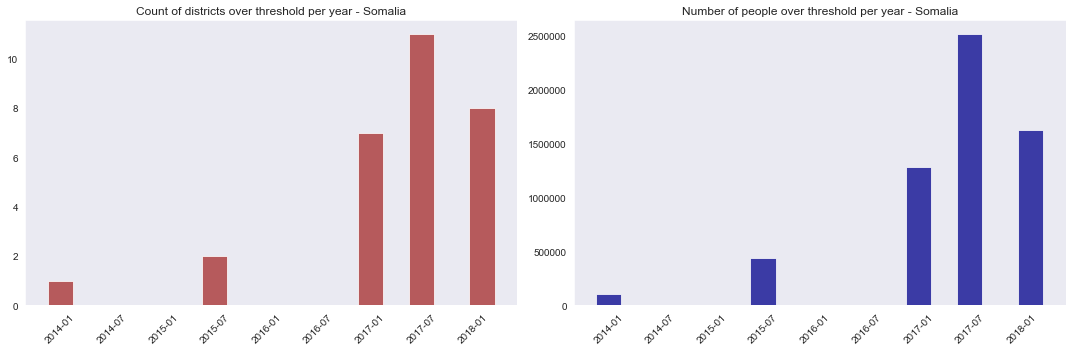

In [10]:
figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.bar(summary_count['date'], summary_count['count'], color='brown', width=90, alpha=0.75)
plt.xticks(rotation=45)
plt.title("Count of districts over threshold per year - Somalia")
plt.tight_layout()
plt.subplot(1,2,2)
plt.bar(summary_pop['date'], summary_pop['at-risk-count'], color='darkblue', width=90, alpha=0.75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Number of people over threshold per year - Somalia")

Map of districts above the threshold for 2014-01-01T00:00:00.000000000
Map of districts above the threshold for 2014-07-01T00:00:00.000000000
Map of districts above the threshold for 2015-01-01T00:00:00.000000000
Map of districts above the threshold for 2015-07-01T00:00:00.000000000
Map of districts above the threshold for 2016-07-01T00:00:00.000000000
Map of districts above the threshold for 2017-01-01T00:00:00.000000000
Map of districts above the threshold for 2017-07-01T00:00:00.000000000
Map of districts above the threshold for 2018-02-01T00:00:00.000000000


<Figure size 525.6x432 with 0 Axes>

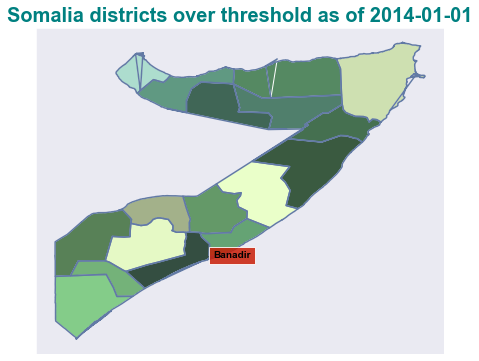

<Figure size 525.6x432 with 0 Axes>

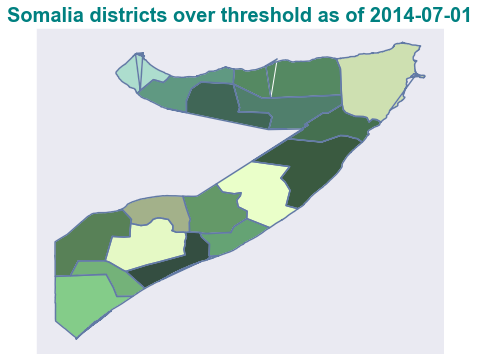

<Figure size 525.6x432 with 0 Axes>

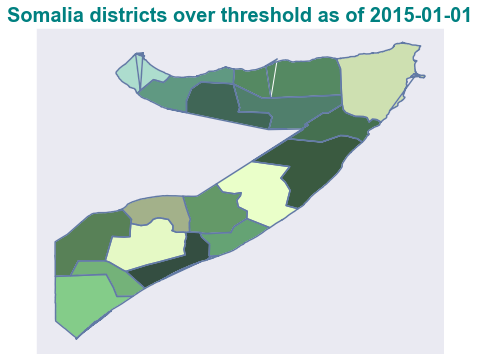

<Figure size 525.6x432 with 0 Axes>

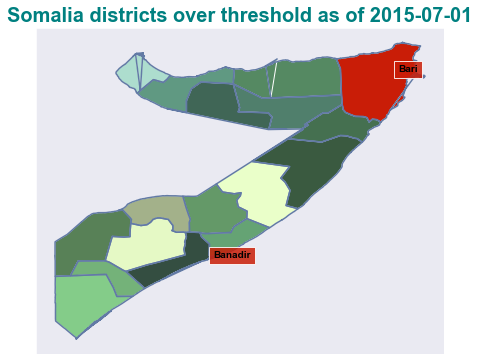

<Figure size 525.6x432 with 0 Axes>

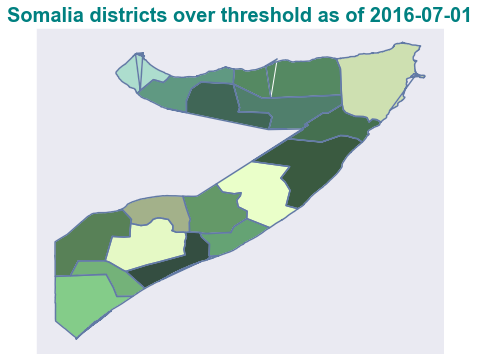

<Figure size 525.6x432 with 0 Axes>

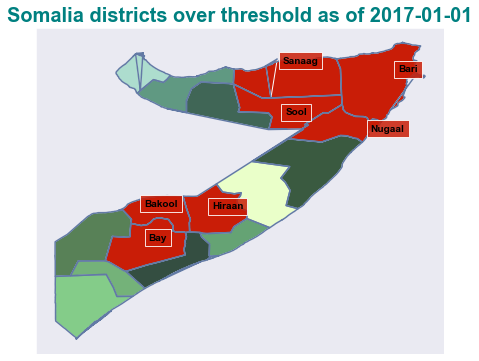

<Figure size 525.6x432 with 0 Axes>

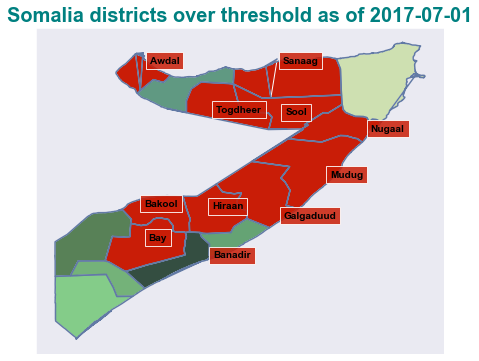

<Figure size 525.6x432 with 0 Axes>

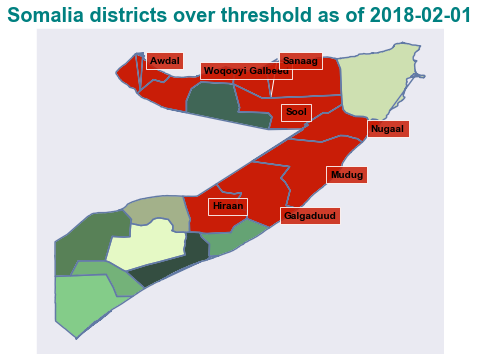

In [11]:
#for date in somalia_reg['date'].unique():
    #print(somalia_reg.loc[somalia_reg['date'] == 'NaT'])
# Map of districts over threshold for each year
for date in somalia_reg['date'].unique():
    date_df = somalia_reg.loc[somalia_reg['date'] == date]
    date_df = date_df.loc[date_df['threshold_reached'] == 1]
    date_dict = {}
    for k, v in date_df.iterrows():
        if v['region'] in sm.region_number.keys():
            date_dict[sm.region_number[v['region']]] = 4
    print("Map of districts above the threshold for " + str(date))
    sm.som_map_plot(sf, date_dict, fill=True, title='Somalia districts over threshold as of ' + str(date).replace('T00:00:00.000000000', ''))

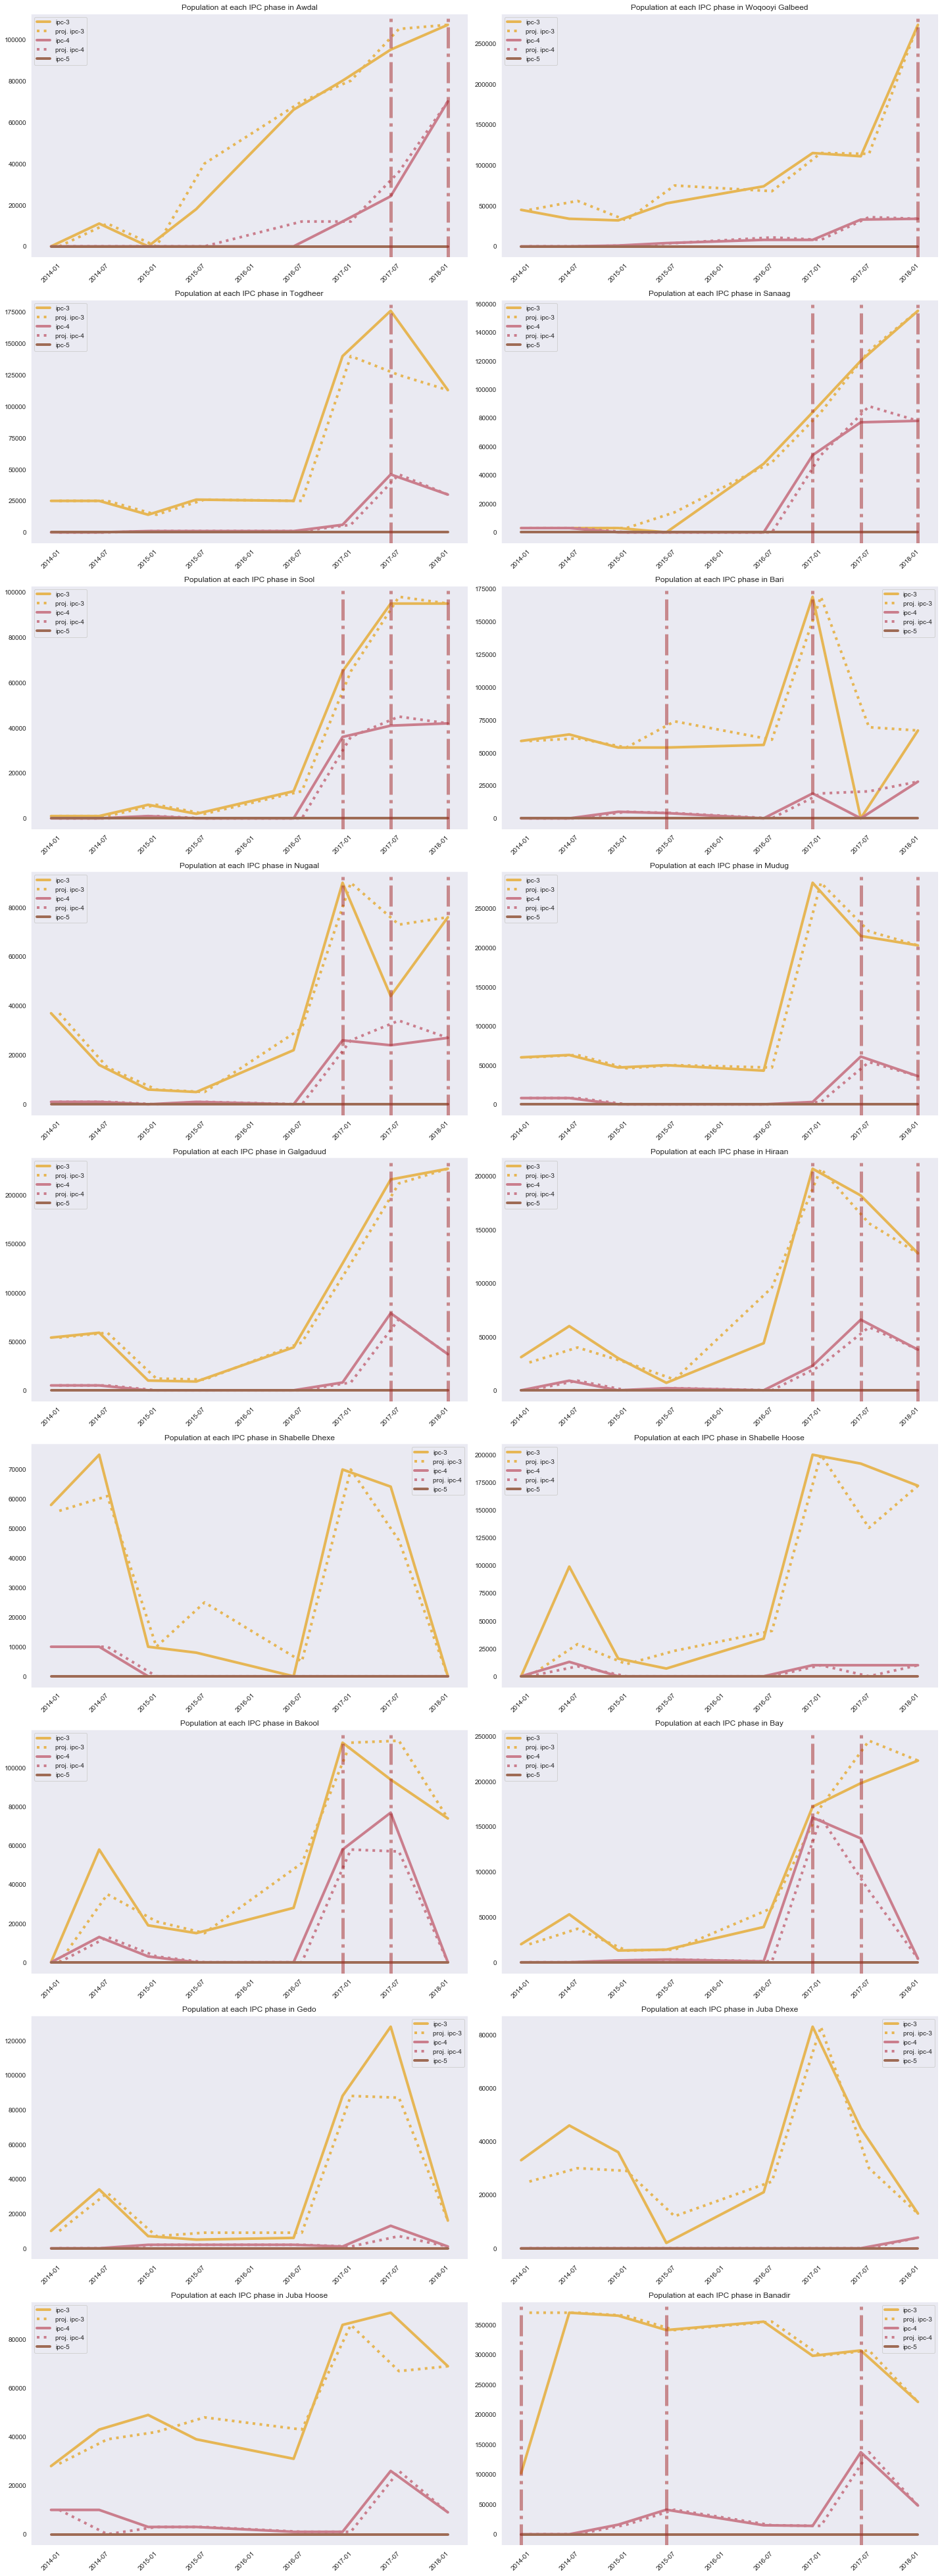

In [12]:
count = 1
figure(figsize=(20, 60))
for region in somalia_reg['region'].unique():
    regional_df = somalia_reg.loc[somalia_reg['region'] == region]
    #reg_proj_df = reg_proj.loc[reg_proj['region'] == region]
    plt.subplot(10, 2, count)
    plt.plot(regional_df['date'], regional_df['ipc-3'], label='ipc-3', color='#E6B655', linewidth=4)
    plt.plot(regional_df['proj-start'], regional_df['proj-ipc-3'], label='proj. ipc-3', color='#E6B655', linewidth=4, linestyle=':')
    plt.plot(regional_df['date'], regional_df['ipc-4'], label='ipc-4', color='#CA7E8D', linewidth=4)
    plt.plot(regional_df['proj-start'], regional_df['proj-ipc-4'], label='proj. ipc-4', color='#CA7E8D', linewidth=4, linestyle=':')
    plt.plot(regional_df['date'], regional_df['ipc-5'], label='ipc-5', color='#9E6B55', linewidth=4)
    plt.title('Population at each IPC phase in ' + str(region))
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    for k, v in regional_df.iterrows():
        if v['threshold_reached'] == 1:
            plt.axvline(v['date'], linewidth=5, color='brown', alpha=0.5, linestyle='-.')
    #for k, v in regional_df.iterrows():
    #    if v['threshold_reached'] == 1:
    #        plt.axvspan(v['proj-start'], v['proj-end'], color='brown',
    #            alpha=0.25) 
    count += 1

<Figure size 1440x4320 with 0 Axes>

<Figure size 525.6x432 with 0 Axes>

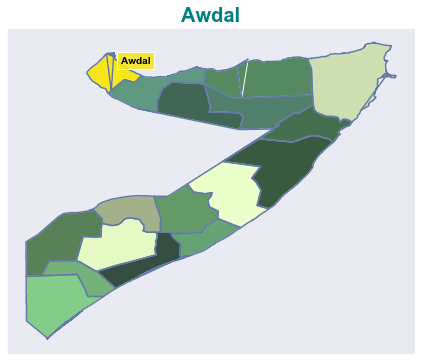

<Figure size 525.6x432 with 0 Axes>

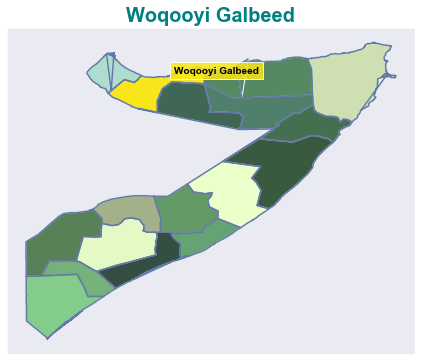

<Figure size 525.6x432 with 0 Axes>

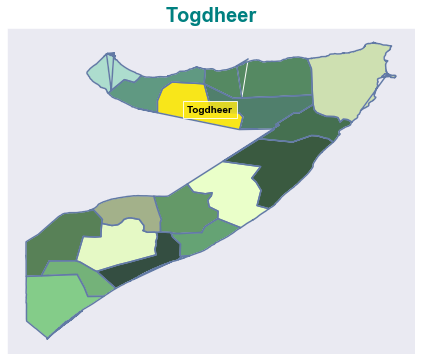

<Figure size 525.6x432 with 0 Axes>

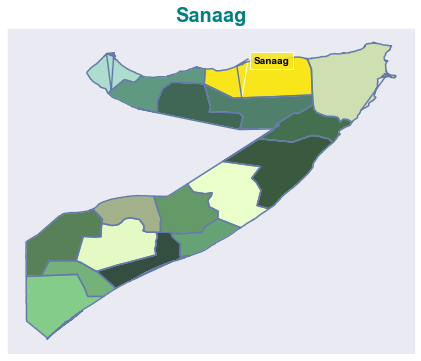

<Figure size 525.6x432 with 0 Axes>

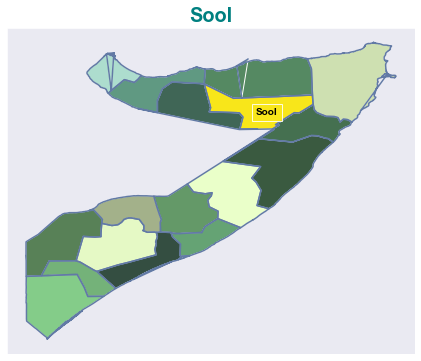

<Figure size 525.6x432 with 0 Axes>

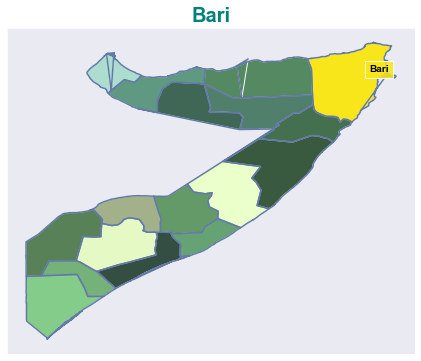

<Figure size 525.6x432 with 0 Axes>

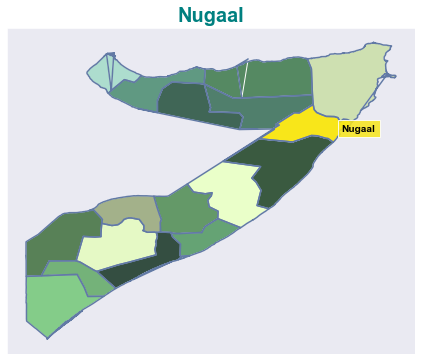

<Figure size 525.6x432 with 0 Axes>

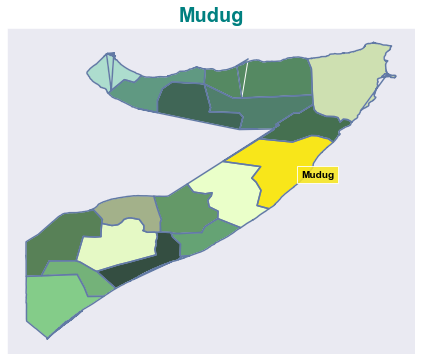

<Figure size 525.6x432 with 0 Axes>

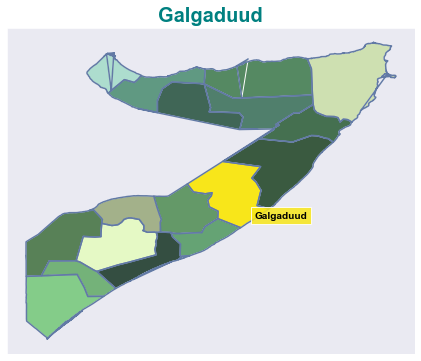

<Figure size 525.6x432 with 0 Axes>

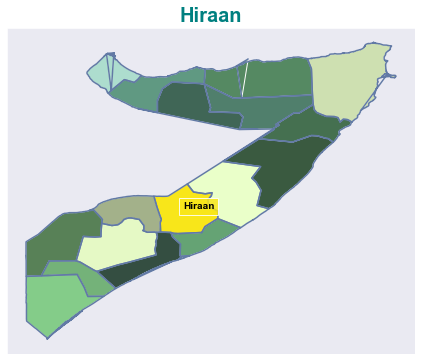

<Figure size 525.6x432 with 0 Axes>

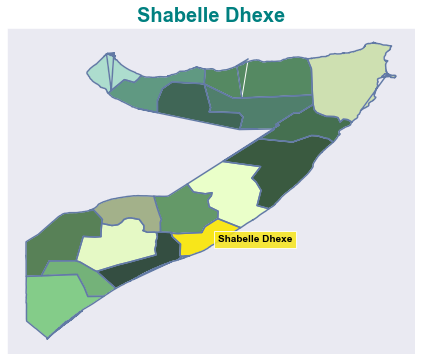

<Figure size 525.6x432 with 0 Axes>

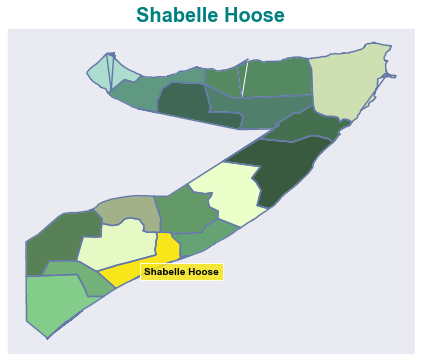

<Figure size 525.6x432 with 0 Axes>

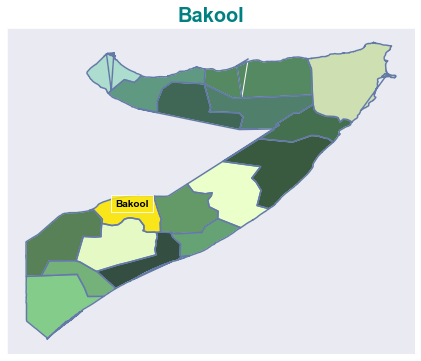

<Figure size 525.6x432 with 0 Axes>

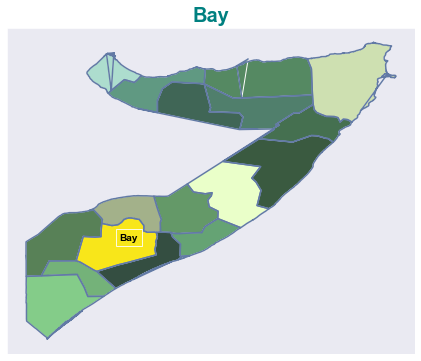

<Figure size 525.6x432 with 0 Axes>

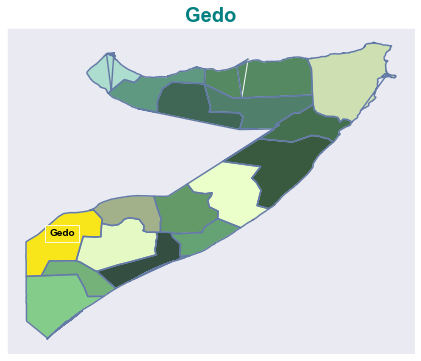

<Figure size 525.6x432 with 0 Axes>

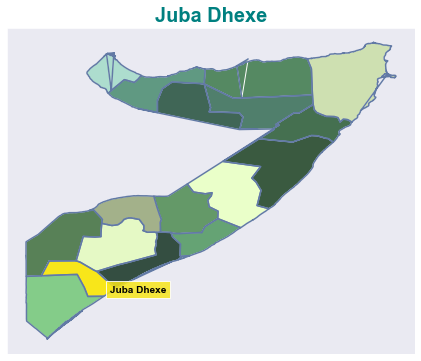

<Figure size 525.6x432 with 0 Axes>

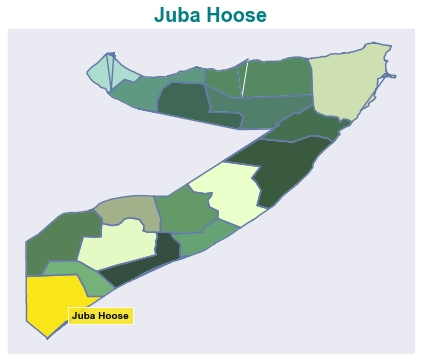

<Figure size 525.6x432 with 0 Axes>

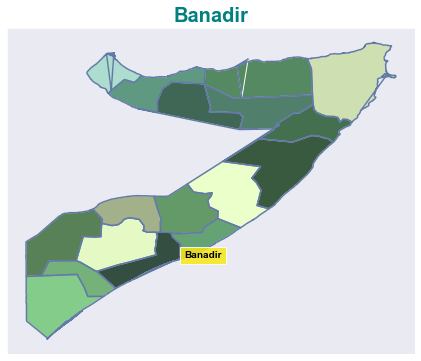

In [19]:
count = 1
figure(figsize=(20, 60))
for region in somalia_reg['region'].unique():
    fills = [sm.region_number[region]]
    #if v['region'] in sm.region_number.keys():
    #sm.som_map_plot(sf, {sm.region_number[region]:2}, fill=True, title=region, fill_region=fills)
    sm.som_map_plot(sf, {sm.region_number[region]:2}, fill=True, title=region, fill_region=fills)

In [14]:
shp_path = './gadm36_SOM_shp/gadm36_SOM_1.shp'
sf = shp.Reader(shp_path)

<Figure size 525.6x432 with 0 Axes>

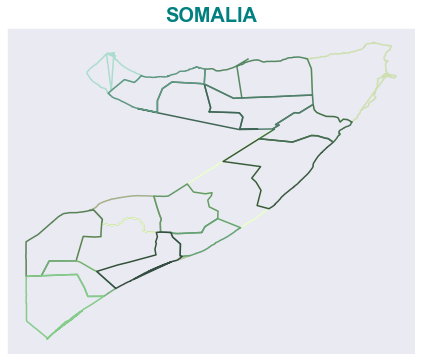

In [15]:
map = sm.som_map_plot(sf)

In [16]:
trans['region'].unique()

NameError: name 'trans' is not defined